In [192]:
import tensorflow as tf
import cv2
import numpy as np

In [193]:
model= tf.keras.models.load_model('licence_plate_detection.h5')
model

(<matplotlib.image.AxesImage at 0x24f9e845ae0>, (224, 224, 3))

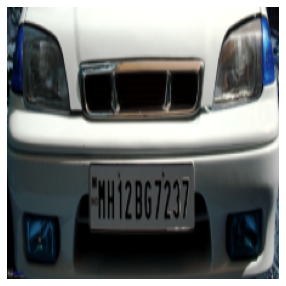

In [194]:
image = cv2.imread('car-plate-detection\images\Cars12.png')
image = cv2.resize(image, (224,224))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.axis('off')
h,w,d = image.shape
plt.imshow(image),image.shape

In [195]:
image = np.array(image)/255
pic = image.reshape(1,224,224,3)

In [196]:
coordinates = model.predict(pic)
coordinates

array([[0.53567374, 0.6142042 , 0.43539432, 0.55251145]], dtype=float32)

In [197]:
import numpy as np
w, h =255 ,255
denorm = np.array([w,w,h,h])
coords = coordinates * denorm
coords = coords.astype(np.int32)
coords

array([[136, 156, 111, 140]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


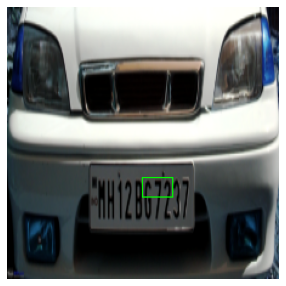

In [198]:
plt.figure(figsize=(10,5))
plt.axis('off')
image = cv2.rectangle(image,(int(coords[0,0]),int(coords[0,1])),(int(coords[0,2]),int(coords[0,3])),(0, 255, 0))
plt.imshow(image)

In [199]:
roi = (image,(int(coords[0,0]),int(coords[0,1])),(int(coords[0,2]),int(coords[0,3])),(0, 255, 0))
roi

(array([[[0.1372549 , 0.2       , 0.25098039],
         [0.08627451, 0.1254902 , 0.16470588],
         [0.01176471, 0.0627451 , 0.0627451 ],
         ...,
         [0.03137255, 0.02352941, 0.04313725],
         [0.02745098, 0.01960784, 0.03137255],
         [0.05098039, 0.03921569, 0.06666667]],
 
        [[0.1372549 , 0.19607843, 0.24313725],
         [0.10588235, 0.14509804, 0.19215686],
         [0.04313725, 0.10196078, 0.10980392],
         ...,
         [0.02745098, 0.01960784, 0.03921569],
         [0.01960784, 0.01960784, 0.03137255],
         [0.05098039, 0.03921569, 0.06666667]],
 
        [[0.13333333, 0.18823529, 0.23529412],
         [0.12941176, 0.17254902, 0.22352941],
         [0.08627451, 0.14901961, 0.16862745],
         ...,
         [0.02352941, 0.01960784, 0.03921569],
         [0.01568627, 0.01568627, 0.02745098],
         [0.04705882, 0.04313725, 0.07058824]],
 
        ...,
 
        [[0.06666667, 0.06666667, 0.0627451 ],
         [0.18823529, 0.18823529, 0.18039

In [200]:
import plotly.express as px
fig = px.imshow(roi)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 15 Cropped image')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
import pytesseract as pt

In [ ]:
text = pt.image_to_string(roi)
print(text)

ValueError: tile cannot extend outside image